### A web service that uses machine learning to make predictions based on the data set powerproduction 
***


In [1]:
# %matplotlib notebook

%matplotlib inline

# importing required packages and libraries
# Numerical arrays
import numpy as np
rng = np.random.default_rng()

# Data frames
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Neural networks
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras import layers

In [2]:
# Plot style
plt.style.use("ggplot")

# Plot size
plt.rcParams["figure.figsize"] = [12, 8]

### Linear

***

***

In [3]:
# importing the data set
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
DataFrame = pd.read_csv(url, error_bad_lines=True)
df = DataFrame[DataFrame != 0].dropna()
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [4]:
x = df["speed"]
y = df["power"]

### Splitting the data set for _train_ and _test_

- ### _train data set_

In [5]:
# Assign the train dat
# train = df[:380]
train = df
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [6]:
x_train = train["speed"]
y_train = train["power"]

- ### _test data set_

In [7]:
# Assign the test data set
test = df[381:]
test

,speed,power
419,20.796,94.216
420,20.871,108.485
421,21.046,99.103
422,21.071,96.348
423,21.121,101.212
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [8]:
x_test = test["speed"]
y_test = test["power"]

### Creating the neural network

In [19]:
# Create a neural network with 50 neurons
model = kr.models.Sequential()

model.add(kr.layers.Dense(100, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
model.add(kr.layers.Dense(50, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# model.add(kr.layers.Dense(25, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# model.add(kr.layers.Dense(12, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# model.add(kr.layers.Dense(6, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# model.add(kr.layers.Dense(3, input_shape = (1,), activation = "sigmoid", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# model.add(kr.layers.Dense(2, activation = "linear", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
model.add(kr.layers.Dense(1, activation = "linear", kernel_initializer = "glorot_uniform", bias_initializer = "glorot_uniform"))
# Compile the model
model.compile(kr.optimizers.Adam(lr=0.001), loss = "mean_squared_error")
# model.compile("adam", loss = "mean_squared_error")

In [20]:
# Train the neural network on training data
model.fit(x_train, y_train, epochs = 500, batch_size = 10)

Epoch 1/500
46/46 [==============================] - 0s 956us/step - loss: 4293.9688
Epoch 2/500
46/46 [==============================] - 0s 999us/step - loss: 3959.8567
Epoch 3/500
46/46 [==============================] - 0s 956us/step - loss: 3793.6541
Epoch 4/500
46/46 [==============================] - 0s 934us/step - loss: 3667.7534
Epoch 5/500
46/46 [==============================] - 0s 1ms/step - loss: 3554.8818
Epoch 6/500
46/46 [==============================] - 0s 1ms/step - loss: 3452.3123
Epoch 7/500
46/46 [==============================] - 0s 1ms/step - loss: 3351.5547
Epoch 8/500
46/46 [==============================] - 0s 1ms/step - loss: 3248.6846
Epoch 9/500
46/46 [==============================] - 0s 1ms/step - loss: 3155.3018
Epoch 10/500
46/46 [==============================] - 0s 956us/step - loss: 3066.9082
Epoch 11/500
46/46 [==============================] - 0s 956us/step - loss: 2981.9182
Epoch 12/500
46/46 [==============================] - 0s 999us/step - los

46/46 [==============================] - 0s 1ms/step - loss: 62.1401
Epoch 99/500
46/46 [==============================] - 0s 1ms/step - loss: 58.7918
Epoch 100/500
46/46 [==============================] - 0s 1ms/step - loss: 55.8360
Epoch 101/500
46/46 [==============================] - 0s 891us/step - loss: 52.6782
Epoch 102/500
46/46 [==============================] - 0s 912us/step - loss: 50.1412
Epoch 103/500
46/46 [==============================] - 0s 978us/step - loss: 47.1696
Epoch 104/500
46/46 [==============================] - 0s 999us/step - loss: 45.2343
Epoch 105/500
46/46 [==============================] - 0s 1ms/step - loss: 44.9608
Epoch 106/500
46/46 [==============================] - 0s 934us/step - loss: 41.0904
Epoch 107/500
46/46 [==============================] - 0s 891us/step - loss: 39.1422
Epoch 108/500
46/46 [==============================] - 0s 913us/step - loss: 37.6471
Epoch 109/500
46/46 [==============================] - 0s 847us/step - loss: 35.2372
Epo

46/46 [==============================] - 0s 978us/step - loss: 17.1440
Epoch 196/500
46/46 [==============================] - ETA: 0s - loss: 14.08 - 0s 934us/step - loss: 17.2709
Epoch 197/500
46/46 [==============================] - 0s 912us/step - loss: 16.9455
Epoch 198/500
46/46 [==============================] - 0s 869us/step - loss: 17.3436
Epoch 199/500
46/46 [==============================] - 0s 1ms/step - loss: 17.5935
Epoch 200/500
46/46 [==============================] - 0s 1ms/step - loss: 17.2247
Epoch 201/500
46/46 [==============================] - 0s 891us/step - loss: 18.3527
Epoch 202/500
46/46 [==============================] - 0s 912us/step - loss: 16.9139
Epoch 203/500
46/46 [==============================] - 0s 869us/step - loss: 16.7906
Epoch 204/500
46/46 [==============================] - 0s 912us/step - loss: 17.3145
Epoch 205/500
46/46 [==============================] - 0s 1ms/step - loss: 17.6238
Epoch 206/500
46/46 [==============================] - 0s 934

46/46 [==============================] - 0s 999us/step - loss: 17.0229
Epoch 293/500
46/46 [==============================] - 0s 1ms/step - loss: 17.5480
Epoch 294/500
46/46 [==============================] - 0s 1ms/step - loss: 17.2609
Epoch 295/500
46/46 [==============================] - 0s 1ms/step - loss: 16.6725
Epoch 296/500
46/46 [==============================] - 0s 1ms/step - loss: 16.5976
Epoch 297/500
46/46 [==============================] - 0s 1ms/step - loss: 16.7711
Epoch 298/500
46/46 [==============================] - 0s 1ms/step - loss: 17.0703
Epoch 299/500
46/46 [==============================] - 0s 891us/step - loss: 16.9139
Epoch 300/500
46/46 [==============================] - 0s 891us/step - loss: 17.3784
Epoch 301/500
46/46 [==============================] - 0s 978us/step - loss: 16.8834
Epoch 302/500
46/46 [==============================] - 0s 999us/step - loss: 16.7265
Epoch 303/500
46/46 [==============================] - 0s 869us/step - loss: 16.9291
Epoch 

46/46 [==============================] - 0s 1ms/step - loss: 16.9684
Epoch 391/500
46/46 [==============================] - 0s 1ms/step - loss: 16.7658
Epoch 392/500
46/46 [==============================] - 0s 1ms/step - loss: 16.6464
Epoch 393/500
46/46 [==============================] - 0s 1ms/step - loss: 17.1394
Epoch 394/500
46/46 [==============================] - 0s 1ms/step - loss: 16.9263
Epoch 395/500
46/46 [==============================] - 0s 891us/step - loss: 17.8806
Epoch 396/500
46/46 [==============================] - 0s 956us/step - loss: 17.3454
Epoch 397/500
46/46 [==============================] - 0s 1ms/step - loss: 17.3708
Epoch 398/500
46/46 [==============================] - 0s 1ms/step - loss: 16.8522
Epoch 399/500
46/46 [==============================] - 0s 1ms/step - loss: 16.8430
Epoch 400/500
46/46 [==============================] - 0s 1ms/step - loss: 16.9095
Epoch 401/500
46/46 [==============================] - 0s 1ms/step - loss: 16.5984
Epoch 402/500


46/46 [==============================] - 0s 1ms/step - loss: 16.4480
Epoch 488/500
46/46 [==============================] - 0s 1ms/step - loss: 16.9592
Epoch 489/500
46/46 [==============================] - 0s 934us/step - loss: 16.5702
Epoch 490/500
46/46 [==============================] - 0s 912us/step - loss: 16.5457
Epoch 491/500
46/46 [==============================] - 0s 948us/step - loss: 16.7683
Epoch 492/500
46/46 [==============================] - 0s 912us/step - loss: 16.7601
Epoch 493/500
46/46 [==============================] - 0s 913us/step - loss: 17.0427
Epoch 494/500
46/46 [==============================] - 0s 1ms/step - loss: 16.6422
Epoch 495/500
46/46 [==============================] - 0s 1ms/step - loss: 16.8994
Epoch 496/500
46/46 [==============================] - 0s 1ms/step - loss: 16.4744
Epoch 497/500
46/46 [==============================] - 0s 1ms/step - loss: 16.8926
Epoch 498/500
46/46 [==============================] - 0s 934us/step - loss: 16.7306
Epoch 

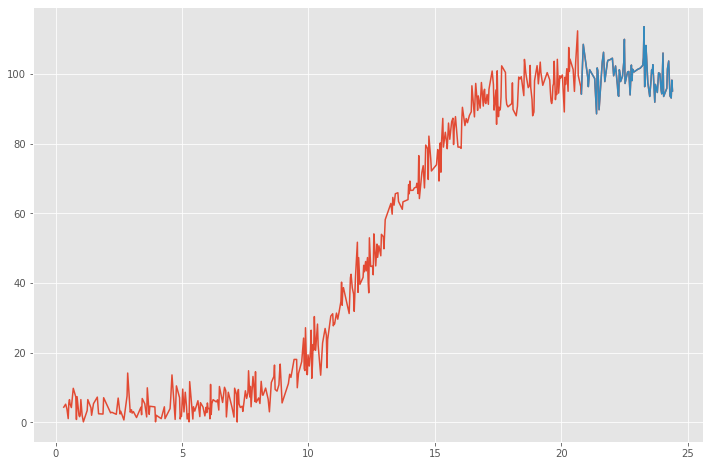

In [22]:
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

## References

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://towardsdatascience.com/demystifying-optimizations-for-machine-learning-c6c6405d3eea




## End